In [19]:
from IPython.display import HTML
HTML(f"""<video src={"https://drive.google.com/uc?id=14r493z3ayjh0yoZVshlw4gM8Y9inck6b"} width=500 controls/>""")

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d mridul18/face-detection

 98% 418M/426M [00:03<00:00, 140MB/s]
100% 426M/426M [00:03<00:00, 124MB/s]


In [4]:
!unzip "*.zip"

Streaming output truncated to the last 5000 lines.
  inflating: face_detection/not_mridul/image (3842).jpg  
  inflating: face_detection/not_mridul/image (3843).jpg  
  inflating: face_detection/not_mridul/image (3844).jpg  
  inflating: face_detection/not_mridul/image (3845).jpg  
  inflating: face_detection/not_mridul/image (3846).jpg  
  inflating: face_detection/not_mridul/image (3847).jpg  
  inflating: face_detection/not_mridul/image (3848).jpg  
  inflating: face_detection/not_mridul/image (3849).jpg  
  inflating: face_detection/not_mridul/image (385).jpg  
  inflating: face_detection/not_mridul/image (3850).jpg  
  inflating: face_detection/not_mridul/image (3851).jpg  
  inflating: face_detection/not_mridul/image (3852).jpg  
  inflating: face_detection/not_mridul/image (3853).jpg  
  inflating: face_detection/not_mridul/image (3854).jpg  
  inflating: face_detection/not_mridul/image (3855).jpg  
  inflating: face_detection/not_mridul/image (3856).jpg  
  inflating: face_dete

In [5]:
os.listdir("face_detection")

['not_mridul', 'mridul']

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [7]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,2)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

In [8]:
path=Path("face_detection")
classes=['mridul','not_mridul']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

mridul


not_mridul


In [9]:
classes=['mridul','not_mridul']
for category in classes:
    for path,dirs,files in os.walk('/content/face_detection/'+category):
      print(files)
      images=files
      dirr='/content/face_detection/'+category
      for filename in images:
         if(filename.endswith('.jpg')):
           path=os.path.join(dirr,filename)
           finalimage=open_image(path)
           try:
              img= face_finder(path)
              finalimage=img[0]
              finalimage.save(path)
           except:
             pass

['me (222).jpg', 'me (323).jpg', 'me (274).jpg', 'me (307).jpg', 'me (297).jpg', 'me (65).jpg', 'me (241).jpg', 'me (279).jpg', 'me (235).jpg', 'me (330).jpg', 'me (377).jpg', 'me (341).jpg', 'me (369).jpg', 'me (217).jpg', 'me (304).jpg', 'me (71).jpg', 'me (303).jpg', 'me (375).jpg', 'me (354).jpg', 'me (283).jpg', 'me (29).jpg', 'me (344).jpg', 'me (292).jpg', 'me (320).jpg', 'me (262).jpg', 'me (263).jpg', 'me (4).jpg', 'me (351).jpg', 'me (335).jpg', 'me (212).jpg', 'me (226).jpg', 'me (350).jpg', 'me (61).jpg', 'me (293).jpg', 'me (358).jpg', 'me (305).jpg', 'me (364).jpg', 'me (295).jpg', 'me (248).jpg', 'me (340).jpg', 'me (327).jpg', 'me (357).jpg', 'me (311).jpg', 'me (215).jpg', 'me (266).jpg', 'me (230).jpg', 'me (285).jpg', 'me (243).jpg', 'me (62).jpg', 'me (319).jpg', 'me (349).jpg', 'me (336).jpg', 'me (259).jpg', 'me (376).jpg', 'me (207).jpg', 'me (237).jpg', 'me (373).jpg', 'me (202).jpg', 'me (299).jpg', 'me (359).jpg', 'me (232).jpg', 'me (234).jpg', 'me (306).jpg'

In [10]:
path=""
tfms = get_transforms()
data = ImageDataBunch.from_folder( Path("face_detection"), valid_pct=0.2, bs=8, size=299, ds_tfms=get_transforms())

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.052548,0.021435,0.996908,01:33
1,0.045085,0.023238,0.997526,01:30
2,0.023859,0.016113,0.996908,01:29
3,0.013529,0.015220,0.997526,01:32


In [13]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
os.makedirs("/content/drive/My Drive/dl_projects/FaceRecognition",exist_ok=True)

In [15]:
my_dir="/content/drive/My Drive/dl_projects/FaceRecognition"

In [16]:
learn.save(my_dir+"/resnet_Stage-1")

In [17]:
learn.export(my_dir+"/export.pkl")

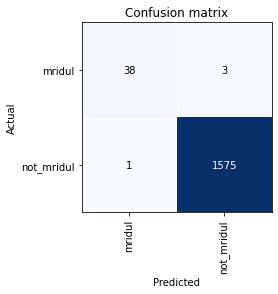

In [18]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()